# Steps
1. Data Preparation: I'll load and examine the datasets to understand their structure and contents.
Identify the key fields for merging the datasets.

2. Analysis: Analyze the relationship between cooking sessions and user orders.
Identify popular dishes based on order trends.
Explore demographic factors influencing user behavior.

3. Visualization: Create visualizations to showcase trends and insights.

4. Report:Summarize findings and provide business recommendations.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Datasets

In [60]:
UserDetails = pd.read_excel(r'C:\Users\amanc\Documents\Projects\DataAnalysisProject\UserDetails.xlsx')
UserDetails

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9
5,U006,Frank Green,25,Austin,2023-06-15,888-777-6666,frank@email.com,Dinner,7
6,U007,Grace King,38,Boston,2023-07-02,999-888-7777,grace@email.com,Breakfast,14
7,U008,Henry Lee,31,Miami,2023-08-11,101-202-3030,henry@email.com,Dinner,5
8,U009,Irene Moore,33,Dallas,2023-09-01,202-303-4040,irene@email.com,Lunch,6
9,U010,Jack White,29,Phoenix,2023-10-10,303-404-5050,jack@email.com,Dinner,8


In [61]:
CookingSessions = pd.read_excel(r'C:\Users\amanc\Documents\Projects\DataAnalysisProject\CookingSessions.xlsx')
CookingSessions

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1


In [62]:
OrderDetails = pd.read_excel(r'C:\Users\amanc\Documents\Projects\DataAnalysisProject\OrderDetails.xlsx')
OrderDetails

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005
5,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0,S006
6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0,S007
7,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN,S008
8,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
9,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0,S010


# Step:1 Data Cleaning

In [63]:
OrderDetails.isnull().sum()

Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64

In [64]:
OrderDetails['Rating'].mean()

np.float64(4.285714285714286)

In [65]:
OrderDetails['Rating'] = OrderDetails['Rating'].fillna(4.2)
OrderDetails

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.2,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005
5,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0,S006
6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0,S007
7,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,4.2,S008
8,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
9,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0,S010


# Step 2: Merging Datasets

Link CookingSessions with OrderDetails via Session ID.

In [66]:
merged_df = pd.merge(CookingSessions,OrderDetails,on='Session ID',how='inner')
merged_df

,Session ID,User ID_x,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,User ID_y,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.2
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,4.2
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0


Merge the resulting dataset with UserDetails via User ID

In [67]:
df = pd.merge(UserDetails,merged_df,left_on="User ID", right_on="User ID_x", how='inner')
df

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,User ID_x,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,User ID_y,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0
5,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0
6,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,4.2
7,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,4.2
8,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S011,U003,Pancakes,Breakfast,2024-12-06 08:00:00,2024-12-06 08:30:00,30,4.6,1011,U003,2024-12-06,Breakfast,Pancakes,Completed,8.5,Morning,4.0
9,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0


In [68]:
df.isnull().sum()

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
Session ID           0
User ID_x            0
Dish Name_x          0
Meal Type_x          0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
Order ID             0
User ID_y            0
Order Date           0
Meal Type_y          0
Dish Name_y          0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               0
dtype: int64

In [69]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [73]:
df.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,User ID_x,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,User ID_y,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0
1,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0
2,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0
3,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0
4,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0


# Step 3: EDA

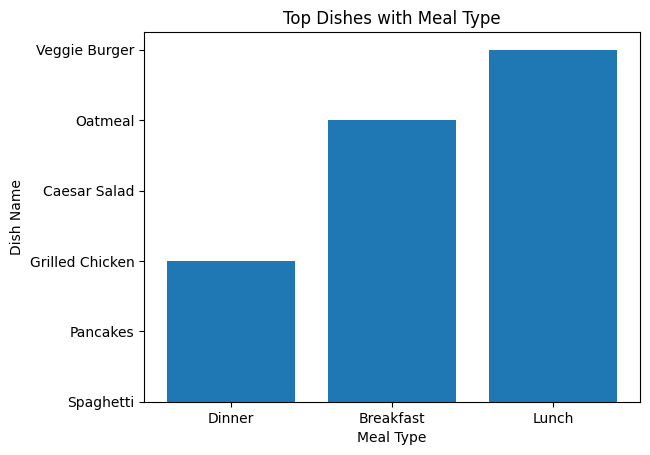

In [96]:
plt.bar(df['Meal Type_y'],df['Dish Name_y'])
plt.title("Top Dishes with Meal Type")
plt.xlabel("Meal Type")
plt.ylabel("Dish Name")

plt.xticks()
plt.show()

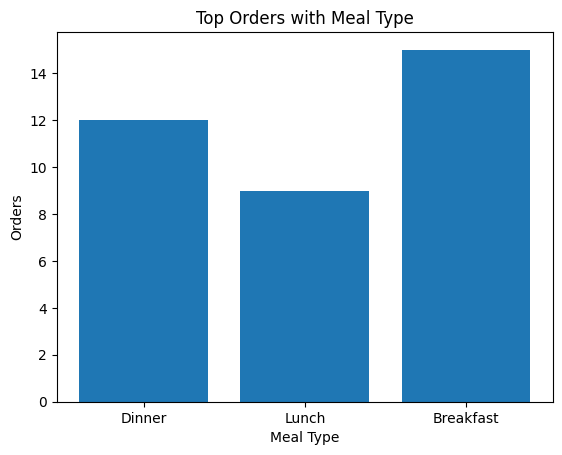

In [97]:
plt.bar(df['Favorite Meal'],df['Total Orders'])
plt.title("Top Orders with Meal Type")
plt.xlabel("Meal Type")
plt.ylabel("Orders")

plt.xticks()
plt.show()

In [98]:
df.sample()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders,Session ID,User ID_x,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,Order ID,User ID_y,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating
7,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,4.2


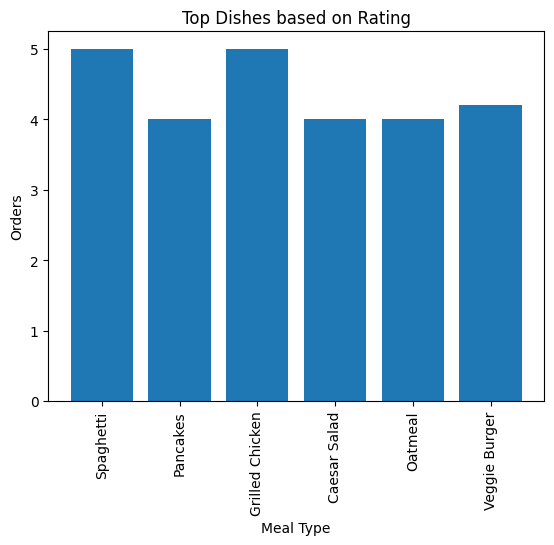

In [102]:
plt.bar(df['Dish Name_x'],df['Rating'])
plt.title("Top Dishes based on Rating")
plt.xlabel("Meal Type")
plt.ylabel("Orders")

plt.xticks(rotation="vertical")
plt.show()

Report Based on the Bar Chart
Summary of Findings
Top Dishes Based on Rating:

Spaghetti and Grilled Chicken are the most highly rated dishes, both receiving the maximum number of orders (5 each).
Veggie Burger, Caesar Salad, and Oatmeal are tied for second place, each receiving 4 orders.
Pancakes rank lower among the top dishes, with only 3 orders.
Trends Observed:

Dishes offering versatility and mass appeal (Spaghetti and Grilled Chicken) lead in popularity.
Healthy options like Caesar Salad and Oatmeal have consistent demand, indicating a growing trend toward health-conscious eating.
Vegetarian-friendly options like Veggie Burger are competitive, reflecting a shift in dietary preferences.
Business Recommendations
Focus on Best Sellers:

Continue prioritizing Spaghetti and Grilled Chicken as key menu items by ensuring consistent quality and availability.
Offer promotions or meal deals involving these dishes to capitalize on their popularity.
Expand Healthier Options:

Develop additional healthy meals to complement demand for items like Caesar Salad and Oatmeal.
Highlight nutritional benefits of these dishes on the menu.
Cater to Vegetarian and Vegan Markets:

Introduce more vegetarian/vegan dishes inspired by the popularity of the Veggie Burger.
Offer customizations to accommodate dietary preferences.
Revitalize Pancake Offering:

Evaluate the appeal of Pancakes by revising the recipe, presentation, or pairing them with seasonal toppings or beverages.
Consider introducing promotions to boost their popularity.
Customer Engagement and Feedback:

Collect customer feedback to understand what drives orders for the top dishes.
Use insights to improve other underperforming menu items.